### Load packages

In [1]:
dep_packages <- c("caret",
                  "pROC", 
                  "SHAPforxgboost",
                  "ggplot2",
                  "xgboost",
                  "data.table",
                  "here",
                  "randomForest",
                  "reprtree",
                  "dplyr",
                  "ggraph",
                  "igraph",
                  "neuralnet",
                  "devtools",
                  "e1071") 
new.packages <- dep_packages[!(dep_packages %in% installed.packages()[,"Package"])] 
if(length(new.packages)) install.packages(new.packages)
lapply(dep_packages, require, character.only = TRUE)

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loading required package: SHAPforxgboost

Loading required package: xgboost

Loading required package: data.table

Loading required package: here

here() starts at C:/Users/wujin/Desktop/Sepsis-death-prediction-main

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loading required package: reprtree

Loading required package: tree

Loading required package: plotrix

Registered S3 method overwritten by 'reprtree':
  method    from
  text.tree tree

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is mask

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

### Read the dataset

In [2]:
sepsisdata=read.csv("sepsis data.csv",header=TRUE,sep=",")
features=colnames(sepsisdata, do.NULL = TRUE, prefix = "col")
features
death=sepsisdata[,222] ## define outcome
table(death)

[1] "age"                 "tmp"                 "pulse_center100"    
  [4] "sbp_center120"       "dbp_center75"        "rr_center18"        
  [7] "spao2"               "map_center100"       "gcs"                
 [10] "angiopoietin2_norm"  "il6_norm"            "tnfa_norm"          
 [13] "scd163_norm"         "il10_norm"           "pentraxin3_norm"    
 [16] "ifnr_norm"           "il8_norm"            "cd14_norm"          
 [19] "trem1_norm"          "cd64_norm"           "icam1_norm"         
 [22] "eselectin_norm"      "pselectin_norm"      "vcam1_norm"         
 [25] "sugar_fs_center180"  "pct"                 "crp"                
 [28] "lactate"             "alb"                 "aptt_center30"      
 [31] "pt"                  "inr"                 "bilt"               
 [34] "bun"                 "ast"                 "inorp_center3"      
 [37] "tro"                 "ddimer"              "cortisol"           
 [40] "ca_center8.75"       "cl"                  "uric"               
 [43] "c3"                  "proteinc_center75"   "po2"                
 [46] "sat"                 "hco3_center25"       "pco2"               
 [49] "ph"                  "tco2"                "abe"                
 [52] "aado2"               "fio2"                "sbc"                
 [55] "sbe"                 "fdp"                 "band"               
 [58] "cre"                 "eos"                 "hb"                 
 [61] "hct"                 "mchc"                "mcv"                
 [64] "plt"                 "rbc"                 "rdw"                
 [67] "wbc_center15"        "K"                   "Na"                 
 [70] "high_blood_pressure" "asthma"              "gout"               
 [73] "parkinson"           "hiv"                 "stroke"             
 [76] "allergy"             "misum"               "chfsum"             
 [79] "pvdsum"              "cdsum"               "dementia"           
 [82] "cpdsum"              "rdsum"               "pudsum"             
 [85] "mldsum"              "hopsum"              "renalsum"           
 [88] "leukemiasum"         "lymphomasum"         "msldsum"            
 [91] "mstsum"              "tumorsum"            "ckdsum"             
 [94] "carriersum"          "flsum"               "cirrhosissum"       
 [97] "liversum"            "copd_final_sum"      "malignancy_final"   
[100] "dm_final"            "res_infection"       "gu_infection"       
[103] "skin_infection"      "abdominal_infection" "cns_infection"      
[106] "msk_infection"       "other_infection"     "card_dysfunction"   
[109] "res_dysfunction"     "gt_dysfunction"      "ren_dysfunction"    
[112] "hep_dysfunction"     "neu_dysfunction"     "met_dysfunction"    
[115] "hem_dysfunction"     "sofa_score"          "sofa_sepsis"        
[118] "sofa_sep_shock"      "gene_sore"           "musc_sore"          
[121] "convulsion"          "gene_weak"           "chills"             
[124] "shak_chil"           "cyanosis"            "fever"              
[127] "sweat"               "no_sweat"            "dry_lips"           
[130] "thirsty"             "cold_extr"           "malaise"            
[133] "drawsy"              "syncope"             "confusion"          
[136] "tachycardia"         "agitation"           "acut_conf"          
[139] "fluc_cour"           "inattention"         "diso_thin"          
[142] "urin_freq"           "oliguria"            "hematuria"          
[145] "diff_void"           "dysuria"             "flan_pain"          
[148] "headache"            "dizziness"           "sore_thro"          
[151] "ches_tigh"           "dyspnea"             "ches_pain"          
[154] "neck_pain"           "nasa_cong"           "sneezing"           
[157] "runn_nose"           "dry_coug"            "prod_coug"          
[160] "sputum"              "hemoptysis"          "abdo_dist"          
[163] "abdo_pain"           "diarrhea"            "constipation"       
[166] "nausea"              "vomit"       

death
  0   1 
510  45 

### Data pre-processing

### Imputing missing values

#### Continuous Variables

In [3]:
sepsisdata_conti<-sepsisdata[,1:69]
dim(sepsisdata_conti)

for(i in 1:ncol(sepsisdata_conti)){
  sepsisdata_conti[is.na(sepsisdata_conti[,i]), i] <- median(sepsisdata_conti[,i], na.rm = TRUE) ## Replacing NA with median value
}
str(sepsisdata_conti)

[1] 555  69

'data.frame':	555 obs. of  69 variables:
 $ age               : int  78 73 71 42 89 77 92 78 63 58 ...
 $ tmp               : num  37.6 36.9 38.3 36 38.3 ...
 $ pulse_center100   : int  121 225 9 1 1849 0 576 81 196 256 ...
 $ sbp_center120     : int  2304 1156 49 100 1521 961 441 625 529 9 ...
 $ dbp_center75      : int  225 289 289 1 169 441 9 400 4 144 ...
 $ rr_center18       : num  144 25 1 0 64 36 36 0 100 1 ...
 $ spao2             : num  91 91 89 92 90 91 74 99 73 98 ...
 $ map_center100     : num  256 1067 361 196 136 ...
 $ gcs               : int  15 15 15 15 4 15 10 15 15 15 ...
 $ angiopoietin2_norm: num  0.0187 0.0251 0.0485 0.0112 0.0491 ...
 $ il6_norm          : num  0.000284 0.00118 0.000429 0.000738 0.000545 ...
 $ tnfa_norm         : num  0.0229 0.115 0.0556 0.0639 0.0837 ...
 $ scd163_norm       : num  0.7062 0.4014 0.0996 0.1907 0.1487 ...
 $ il10_norm         : num  7.71e-04 3.40e-14 1.89e-04 3.40e-14 3.98e-03 ...
 $ pentraxin3_norm   : num  0.4528 0.0674 0.0673 

#### Normalization by z score

In [4]:
sepsisdata_conti<-as.data.frame(scale(sepsisdata_conti))
length(which(is.na(sepsisdata_conti)))

[1] 0

#### Categorical Variables

In [5]:
sepsisdata_cate<-sepsisdata[, 70:221]
sepsisdata_cate[sepsisdata_cate=="?"]<- NA
length(which(is.na(sepsisdata_cate)))

sepsisdata_cate[is.na(sepsisdata_cate)] <- 0  ### Replacing NA with 0 (問卷,症狀,或共病)
length(which(is.na(sepsisdata_cate)))

[1] 23

[1] 0

### Combining Data after pre-processing

In [6]:
mydata<-cbind(death, sepsisdata_conti, sepsisdata_cate)
table(mydata$death)
mydata$death_binary=ifelse(mydata$death=="0","Survive","Death")
mydata=mydata[,-1]
mydata$death_binary=as.factor(mydata$death_binary)
table(mydata$death_binary)


  0   1 
510  45 


  Death Survive 
     45     510 

###  Model derivation

#### Data partitioning by stratified method ###########

In [7]:
mydata1=mydata[which(mydata$death_binary=="Survive"),]
mydata2=mydata[which(mydata$death_binary=="Death"),]
index1=sample(dim(mydata1)[1],nrow(mydata1)*0.3)
index2=sample(dim(mydata2)[1],nrow(mydata2)*0.3)
testing=rbind(mydata1[index1,],mydata2[index2,])
training=rbind(mydata1[-index1,],mydata2[-index2,])
##smote_train<-SMOTE(death_binary~.,data=training)
table(training$death_binary)
##table(smote_train$death_binary)
dim(training)


  Death Survive 
     32     357 

[1] 389 222

In [8]:
head(training)

,age,tmp,pulse_center100,sbp_center120,dbp_center75,rr_center18,spao2,map_center100,gcs,angiopoietin2_norm,⋯,chills_final,bthypo,rdw145,rbc4,no_chills,charm,without_blooddrawn,doi_symptom,POD_in_15days,death_binary
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,0.88443426,-0.2950190,-0.5240873,0.58948662,-0.16062560,3.3642069,-0.4901748,-0.26207069,0.4395478,-0.4721512,⋯,0,0,0,1,1,3,0,4,3,Survive
2,0.59957991,-0.8522087,-0.3956975,-0.02844682,-0.03668362,0.1721566,-0.4901748,1.11962833,0.4395478,-0.4217640,⋯,0,0,0,1,1,2,0,11,2,Survive
3,0.48563817,0.2621737,-0.6623533,-0.62431121,-0.03668362,-0.4716182,-0.9116264,-0.08320687,0.4395478,-0.2359280,⋯,0,0,0,1,1,2,0,9,2,Survive
4,-1.16651706,-1.5685997,-0.6722295,-0.59685946,-0.59442254,-0.4984422,-0.2794490,-0.36427858,0.4395478,-0.5310797,⋯,0,0,0,0,1,1,0,8,2,Survive
6,0.82746339,-1.8073957,-0.6734640,-0.13340938,0.25767859,0.4672201,-0.4901748,-0.34818980,0.4395478,3.1119616,⋯,0,1,0,1,1,4,0,3,2,Survive
9,0.02987121,0.7397687,-0.4314985,-0.36594182,-0.58861276,2.1839530,-4.2832391,-0.67525559,0.4395478,-0.3037121,⋯,1,0,0,0,0,1,0,1,2,Survive


### Solving classification problems with Neural Networks Model (4 hidden)

ℹ SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef

Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:plotrix':

    rescale


Loading required package: reshape


Attaching package: 'reshape'


The following object is masked from 'package:dplyr':

    rename


The following object is masked from 'package:data.table':

    melt




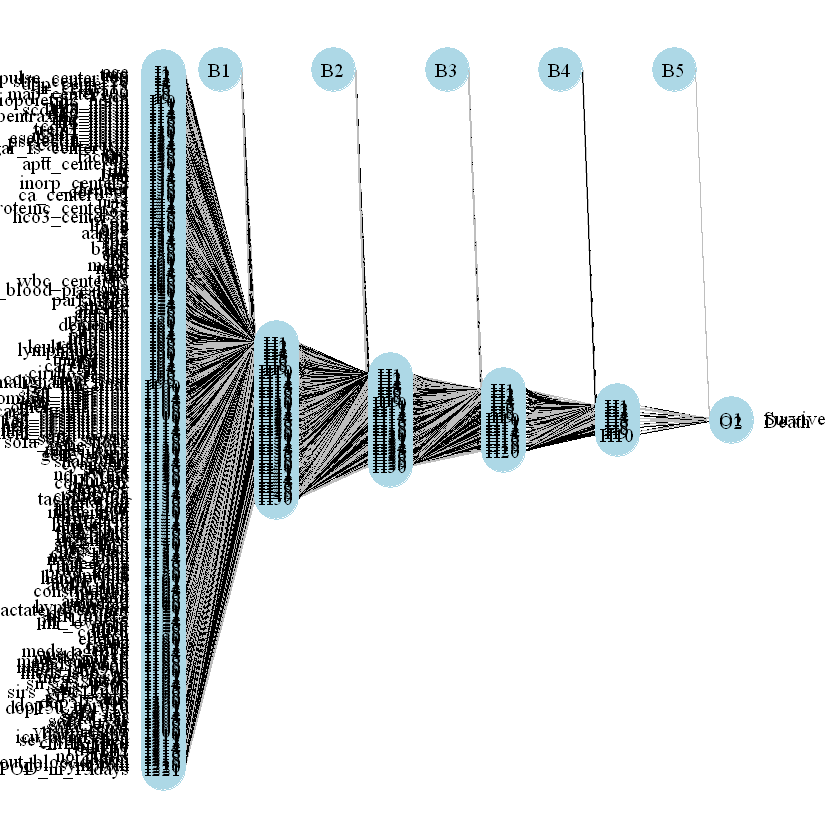

In [9]:
nnetmodelfit2<-neuralnet(death_binary ~ .,
                         data=training,
                         hidden = c(50,30,20,10),
                         linear.output = T)

source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
par(mar=numeric(4),family='serif')
plot.nnet(nnetmodelfit2)

In [10]:
## The resulting output (Training set)
training$death_binary1=ifelse(training$death_binary=="Survive",0,1)
nn.results.train <- compute(nnetmodelfit2, training)
results.train <- data.frame(actual = training$death_binary1, prediction = nn.results.train$net.result)
results.train

,actual,prediction.1,prediction.2
,<dbl>,<dbl>,<dbl>
1,0,4.920629e-04,1.0006246
2,0,-6.684675e-05,1.0004426
3,0,2.829794e-03,0.9979613
4,0,-1.973916e-04,0.9998145
6,0,2.058356e-04,1.0003899
9,0,-4.163773e-04,0.9996557
10,0,3.309429e-04,1.0006559
11,0,-1.046395e-04,0.9996721
13,0,-1.799400e-04,0.9998492


In [11]:
roundedresults.train<-sapply(results.train,round,digits=0)
roundedresults.train=as.data.frame(roundedresults.train)
head(roundedresults.train)

,actual,prediction.1,prediction.2
,<dbl>,<dbl>,<dbl>
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1


In [12]:
roundedresults.train$actual=as.factor(roundedresults.train$actual)
roundedresults.train$prediction.1=as.factor(roundedresults.train$prediction.1)

In [13]:
confusionMatrix(roundedresults.train$prediction.1,roundedresults.train$actual)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 357   0
         1   0  32
                                     
               Accuracy : 1          
                 95% CI : (0.9906, 1)
    No Information Rate : 0.9177     
    P-Value [Acc > NIR] : 3.144e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.9177     
         Detection Rate : 0.9177     
   Detection Prevalence : 0.9177     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [14]:
## The resulting output (Testing set)
testing$death_binary1=ifelse(testing$death_binary=="Survive",0,1)
nn.results.test <- compute(nnetmodelfit2, testing)
results.test <- data.frame(actual = testing$death_binary1, prediction = nn.results.test$net.result)
results.test

,actual,prediction.1,prediction.2
,<dbl>,<dbl>,<dbl>
277,0,-0.041536829,1.0497188
356,0,-0.009560585,1.0108116
457,0,0.024417541,0.9755179
128,0,0.023761924,0.9749237
511,0,-0.002216474,1.0012077
426,0,-0.052661924,1.0637785
21,0,0.744127906,0.2550639
38,0,-0.008545858,1.0094705
230,0,0.029511282,0.9681401


In [15]:
roundedresults.test<-sapply(results.test,round,digits=0)
roundedresults.test=as.data.frame(roundedresults.test)
roundedresults.test

actual,prediction.1,prediction.2
<dbl>,<dbl>,<dbl>
0,0,1
0,0,1
0,0,1
0,0,1
0,0,1
0,0,1
0,1,0
0,0,1
0,0,1


In [16]:
roundedresults.test$actual=as.factor(roundedresults.test$actual)
roundedresults.test$prediction.1=as.factor(roundedresults.test$prediction.1)

In [17]:
confusionMatrix(roundedresults.test$actual,roundedresults.test$prediction.1)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148   5
         1  10   3
                                          
               Accuracy : 0.9096          
                 95% CI : (0.8553, 0.9485)
    No Information Rate : 0.9518          
    P-Value [Acc > NIR] : 0.9932          
                                          
                  Kappa : 0.2404          
                                          
 Mcnemar's Test P-Value : 0.3017          
                                          
            Sensitivity : 0.9367          
            Specificity : 0.3750          
         Pos Pred Value : 0.9673          
         Neg Pred Value : 0.2308          
             Prevalence : 0.9518          
         Detection Rate : 0.8916          
   Detection Prevalence : 0.9217          
      Balanced Accuracy : 0.6559          
                                          
       'Positive' Class : 0               
                              

In [18]:
ROC_train=roc(results.train$actual,results.train$prediction.1)
ROC_train
ci.auc(ROC_train)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = results.train$actual, predictor = results.train$prediction.1)

Data: results.train$prediction.1 in 357 controls (results.train$actual 0) < 32 cases (results.train$actual 1).
Area under the curve: 1

Warning message in ci.auc.roc(ROC_train):
"ci.auc() of a ROC curve with AUC == 1 is always 1-1 and can be misleading."


95% CI: 1-1 (DeLong)

In [19]:
ROC_test=roc(results.test$actual,results.test$prediction.1)
ROC_test
ci.auc(ROC_test)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = results.test$actual, predictor = results.test$prediction.1)

Data: results.test$prediction.1 in 153 controls (results.test$actual 0) < 13 cases (results.test$actual 1).
Area under the curve: 0.6365

95% CI: 0.4276-0.8454 (DeLong)

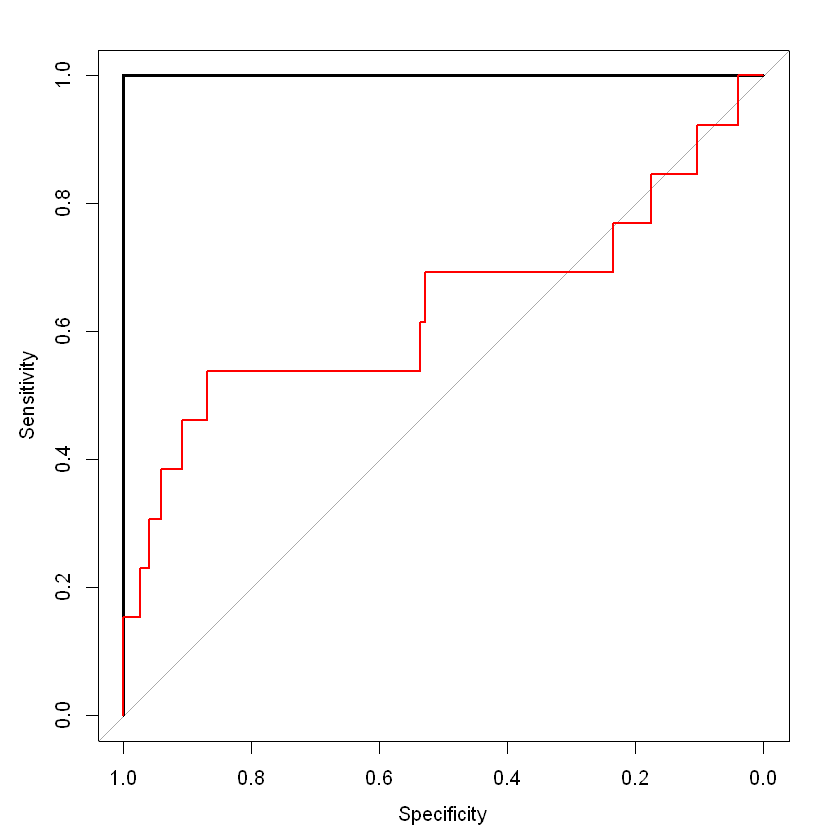

In [20]:
plot(ROC_train,lty=1,lwd=3)
plot(ROC_test,add=TRUE,col="red")